# Enter Student Name & ID

In [1]:
student_id =   400100962
student_name = "Parsa Hatami"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400100962
your name: Parsa Hatami


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [6]:
def myPCA(X, num_components):
    mean_adjusted = X - np.mean(X, axis=0)
    cov_matrix = np.cov(mean_adjusted, rowvar=False)
    eig_values, eig_vectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.flip(np.argsort(eig_values))
    eig_values_sorted = eig_values[sorted_indices]
    eig_vectors_sorted = eig_vectors[:, sorted_indices]
    eig_vectors_subset = eig_vectors_sorted[:, :num_components]
    transformed_data = np.dot(mean_adjusted, eig_vectors_subset)
    
    return transformed_data

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

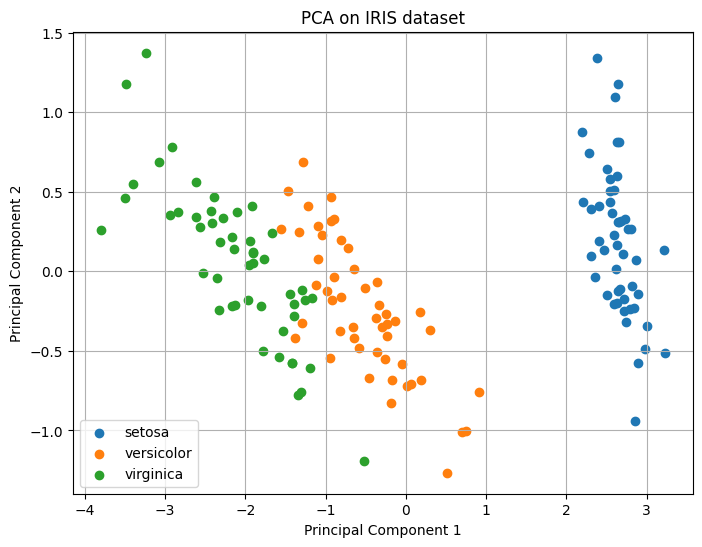

In [7]:
# myPCA on IRIS 
iris = load_iris()
X = iris.data
y = iris.target
num_components = 2
X_reduced = myPCA(X, num_components)
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    subset = X_reduced[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on IRIS dataset')
plt.legend()
plt.grid(True)
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `


Eigenfaces refer to the eigenvectors that are derived from the covariance matrix of a set of facial images. Each eigenface represents a direction in the high-dimensional space of facial images, where the direction is associated with a particular pattern of variation in the appearance of faces.

Data Preparation: A large set of facial images is collected. Each image is converted to a vector by flattening the 2D image into a 1D vector.
Mean Centering: The mean face is computed by averaging all the face vectors. Each face vector is then centered by subtracting the mean face.
Covariance Matrix: The covariance matrix of the centered face vectors is computed.
Eigenvectors and Eigenvalues: The eigenvectors and corresponding eigenvalues of the covariance matrix are calculated. These eigenvectors are the eigenfaces.
Selection: The top eigenfaces corresponding to the largest eigenvalues are selected. These eigenfaces capture the most significant features of the faces in the dataset.

PCA is a statistical technique that transforms data into a set of orthogonal components (principal components) ordered by the amount of variance they explain in the data. Eigenfaces are directly related to PCA in the following ways:

Principal Components: In the context of face recognition, each principal component (eigenface) represents a direction in the feature space where there is significant variation in the data. These principal components are the eigenvectors of the covariance matrix of the face images.
Dimensionality Reduction: PCA reduces the dimensionality of the facial image data by projecting the original high-dimensional data onto a lower-dimensional subspace spanned by the eigenfaces. This reduces the complexity of the face recognition problem.
Feature Extraction: The eigenfaces serve as features that can be used to represent and compare faces. Each face can be approximated as a linear combination of the top eigenfaces, with the coefficients serving as the feature representation of the face.
Reconstruction: Any facial image can be reconstructed by a weighted sum of the selected eigenfaces. This reconstruction is typically an approximation, as only the top eigenfaces are used, capturing the most important variations.
Practical Application in Face Recognition
In a face recognition system using eigenfaces:

Training Phase:
Collect a set of training images.
Compute the mean face and subtract it from each training image.
Calculate the covariance matrix and its eigenvectors (eigenfaces).
Project each training image onto the subspace defined by the eigenfaces to obtain their feature representations.
Recognition Phase:
For a new face image, center it by subtracting the mean face.
Project the centered image onto the eigenface subspace to obtain its feature representation.
Compare this feature representation with those of the known faces in the database using a suitable distance metric (e.g., Euclidean distance) to identify or verify the face.

Eigenfaces are a practical implementation of PCA for face recognition. They leverage the ability of PCA to capture the most significant variations in a high-dimensional dataset and use these variations to efficiently represent and recognize facial images. By focusing on the principal components, eigenfaces reduce the dimensionality of the problem while preserving the essential features needed for accurate face recognition.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [8]:
import os
import cv2
from sklearn.model_selection import train_test_split

dataset_path = '/kaggle/input/facesdataset1/ORL'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The dataset path '{dataset_path}' does not exist. Please check the path.")

images = []
labels = []

for person_name in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person_name)
    if os.path.isdir(person_folder):
        person_images = []
        for image_name in sorted(os.listdir(person_folder)):
            image_path = os.path.join(person_folder, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                person_images.append(image.flatten())
            else:
                continue
        if len(person_images) >= 10:
            images.extend(person_images[:10])  # Ensure there are exactly 10 images per person
            labels.extend([person_name] * 10)
        else:
            print(f"Warning: Person '{person_name}' does not have enough images (found {len(person_images)}). Skipping.")

images = np.array(images)
labels = np.array(labels)

if len(images) == 0 or len(labels) == 0:
    raise ValueError("No images or labels have been read. Please check your dataset and directory structure.")

X_train, X_test = [], []
y_train, y_test = [], []

unique_labels = np.unique(labels)
for label in unique_labels:
    person_indices = np.where(labels == label)[0]
    if len(person_indices) >= 10:
        X_train.extend(images[person_indices[:5]])
        X_test.extend(images[person_indices[5:]])
        y_train.extend(labels[person_indices[:5]])
        y_test.extend(labels[person_indices[5:]])
    else:
        print(f"Warning: Person '{label}' does not have enough images for training and testing. Skipping.")

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [9]:
num_components = 50  # reduce to 50 components
X_train_reduced = myPCA(X_train, num_components)

covariance_matrix = np.dot((X_train - np.mean(X_train, axis=0)).T, (X_train - np.mean(X_train, axis=0))) / (X_train.shape[0] - 1)
eigenvalues, _ = np.linalg.eig(covariance_matrix)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
variance_explained = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
num_components_optimal = np.argmax(variance_explained >= 0.952) + 1  

print(f'Number of components to explain 95% variance: {num_components_optimal}')

X_train_reduced = myPCA(X_train, num_components_optimal)
X_test_reduced = myPCA(X_test, num_components_optimal)

print(f'X_train_reduced shape: {X_train_reduced.shape}')
print(f'X_test_reduced shape: {X_test_reduced.shape}')

Number of components to explain 95% variance: 50
X_train_reduced shape: (200, 50)
X_test_reduced shape: (200, 50)


In [10]:
from sklearn.decomposition import PCA
num_components = 50
pca = PCA(n_components=num_components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(f'X_train_reduced shape: {X_train_reduced.shape}')
print(f'X_test_reduced shape: {X_test_reduced.shape}')

X_train_reduced shape: (200, 50)
X_test_reduced shape: (200, 50)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train_reduced, y_train)

y_pred = lda.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of PCA components: 100, Accuracy: 92.00%
Number of PCA components: 95, Accuracy: 92.50%
Number of PCA components: 90, Accuracy: 91.00%
Number of PCA components: 85, Accuracy: 92.50%
Number of PCA components: 80, Accuracy: 91.50%
Number of PCA components: 75, Accuracy: 92.00%
Number of PCA components: 70, Accuracy: 92.50%
Number of PCA components: 65, Accuracy: 91.50%
Number of PCA components: 60, Accuracy: 93.00%
Number of PCA components: 55, Accuracy: 93.00%
Number of PCA components: 50, Accuracy: 92.00%
Number of PCA components: 45, Accuracy: 92.50%
Number of PCA components: 40, Accuracy: 91.50%


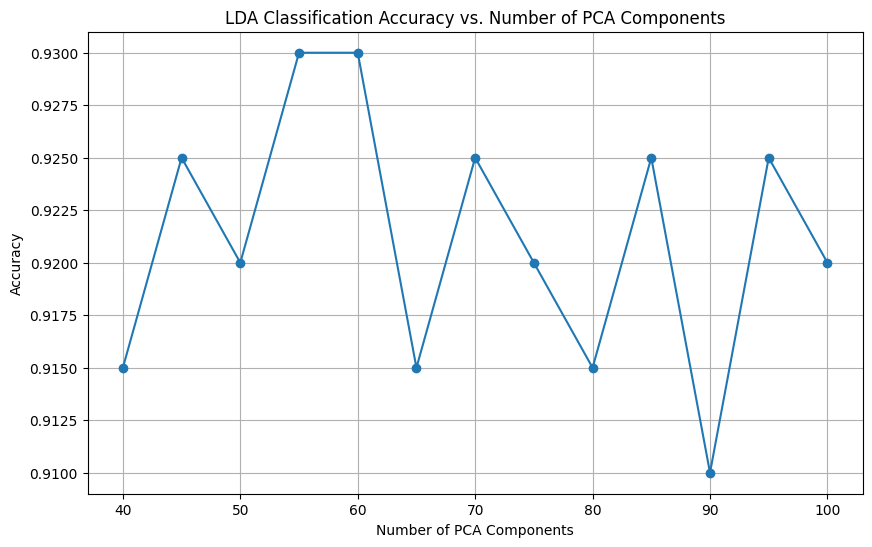

The sufficient number of features is: 60 with an accuracy of 93.00%


In [13]:
pca_components = range(100, 39, -5)  # From 100 to 40 with steps of 10
results = {}

for n_components in pca_components:
    pca = PCA(n_components=num_components)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    lda = LDA()
    lda.fit(X_train_reduced, y_train)
    y_pred = lda.predict(X_test_reduced)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[n_components] = accuracy
    #print(f'Accuracy with {n_components} PCA components: {accuracy * 100:.2f}%')

for n_components, accuracy in results.items():
    print(f'Number of PCA components: {n_components}, Accuracy: {accuracy * 100:.2f}%')

components = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('LDA Classification Accuracy vs. Number of PCA Components')
plt.grid(True)
plt.show()

sufficient_components = max(results, key=results.get)
print(f'The sufficient number of features is: {sufficient_components} with an accuracy of {results[sufficient_components] * 100:.2f}%')

with the result of the part above, we can see that the maximum accuracy achieved in 55 and 60. if we use few number of components, it may be underfitting. then if we use large number of components, we will have more computatinal cost. in this case may it results to overfitting. from the plot we can the effect we explained.

here is more detailed discussion for effect of number of components on the accuracy of the model.

1. Variance Explained
High Number of Components: When a larger number of components is chosen, the PCA retains more of the original data’s variance. This means more information is preserved, which can potentially lead to a more accurate model since less relevant information is discarded.
Low Number of Components: Choosing fewer components results in a higher loss of information, as PCA will only retain the most significant components that capture the largest variance. While this reduces the dimensionality, it might exclude some important features, potentially reducing the model's accuracy.
2. Overfitting vs. Underfitting
High Number of Components: Retaining too many components can lead to overfitting, where the model learns the noise and specificities of the training data rather than the underlying pattern. This reduces the model's generalizability to new, unseen data.
Low Number of Components: Retaining too few components can lead to underfitting, where the model is too simple to capture the underlying structure of the data. This also leads to poor performance on both training and new data.
3. Computational Efficiency
High Number of Components: More components increase the computational complexity and memory usage. This can slow down the training process and make it difficult to scale the model to large datasets.
Low Number of Components: Fewer components result in lower computational demands, making the model faster to train and easier to scale. This is beneficial when dealing with large datasets or real-time processing requirements.
4. Noise Reduction
High Number of Components: Including many components can reintroduce noise into the model, which PCA was initially meant to reduce. This noise can detract from the model's performance.
Low Number of Components: By selecting fewer components, PCA can effectively reduce noise, leading to a cleaner and potentially more accurate model. However, it's crucial to ensure that the components retained are still sufficient to describe the data accurately.
5. Interpretability
High Number of Components: A model with many components can become complex and difficult to interpret. Understanding the relationship between the input data and the output predictions becomes challenging.
Low Number of Components: Fewer components can simplify the model, making it easier to interpret and understand. This is particularly important in domains where model transparency and explainability are crucial.
6. Domain-Specific Considerations
High Number of Components: In some domains, such as image or speech recognition, retaining more components might be necessary to capture subtle features.
Low Number of Components: In other domains, such as certain medical or financial applications, fewer components might be sufficient to capture the necessary patterns without overcomplicating the model.
Conclusion
Choosing the number of components in PCA is a trade-off between preserving variance and reducing dimensionality. It's often beneficial to experiment with different numbers of components and use cross-validation to determine the optimal balance. Techniques such as scree plots, explained variance plots, and cumulative variance can help in making this decision. The ultimate goal is to retain enough components to accurately capture the underlying structure of the data while avoiding overfitting, reducing noise, and maintaining computational efficiency.